In [2]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pmdarima as pm

In [39]:
# 삼성주식 찾기
df_krx = fdr.StockListing('KRX')
df_krx.head(3)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,68400,3,0,0.00,68100,68700,68000,3892428,266025902200,408333126420000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,581000,1,7000,1.22,574000,584000,572000,110592,63974350000,135954000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,96700,2,-1200,-1.23,97400,97800,96300,931727,90258819700,70397828695500,728002365,STK


In [40]:
ticker = df_krx[df_krx['Name']=='삼성전자']['Code']

In [48]:
#2020-01-01부터 삼성주가
ss = fdr.DataReader(''.join(ticker.values), '2020-01-01')

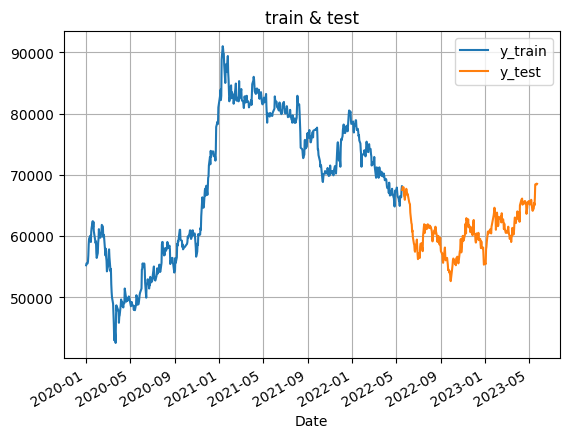

In [49]:
# train과 test set으로 구분 (7:3)
y_train = ss['Close'][:int(0.7*len(ss))]
y_test = ss['Close'][int(0.7*len(ss)):]
plt.subplot()
plt.title('train & test')
y_train.plot(label='y_train')
y_test.plot(label='y_test')
plt.grid(True)
plt.legend(loc='best')


In [50]:
# pmdarima.arima.ndiffs 를 활용한 차분 필요 여부 및 추정차수
kpss_diffs = pm.arima.ndiffs(y_train, alpha=0.5, test='kpss', max_d=6)
adf_diffs = pm.arima.ndiffs(y_test, alpha=0.5, test='adf', max_d=6)
max(adf_diffs, kpss_diffs)

6

In [51]:
np.log(ss['Close'])

Date
2020-01-02    10.918718
2020-01-03    10.924138
2020-01-06    10.924138
2020-01-07    10.929529
2020-01-08    10.947292
                ...    
2023-05-18    11.100436
2023-05-19    11.133128
2023-05-22    11.134589
2023-05-23    11.133128
2023-05-24    11.134589
Name: Close, Length: 840, dtype: float64

In [52]:
# log를 활용한 변동성 완화
ss_log = np.log(ss['Close'])
ss_log

Date
2020-01-02    10.918718
2020-01-03    10.924138
2020-01-06    10.924138
2020-01-07    10.929529
2020-01-08    10.947292
                ...    
2023-05-18    11.100436
2023-05-19    11.133128
2023-05-22    11.134589
2023-05-23    11.133128
2023-05-24    11.134589
Name: Close, Length: 840, dtype: float64

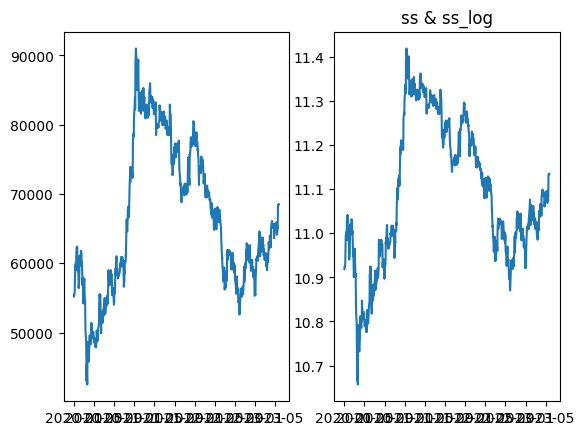

In [53]:
#그래프로 확인
f, (ax1, ax2) =plt.subplots(1,2)
plt.title('ss & ss_log')
ax1.plot(ss['Close'])
ax2.plot(ss_log)
plt.show()

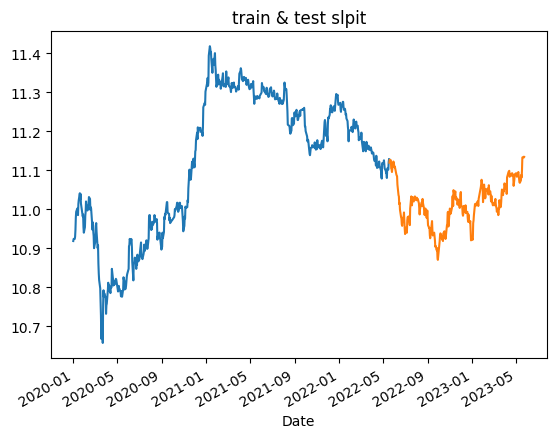

In [54]:
# train set 과 test set 으로 구분 (7:3)
y_train = ss_log[:int(0.7*len(ss))]
y_test = ss_log[int(0.7*len(ss)):]
plt.subplot()
plt.title('train & test slpit')
y_train.plot()
y_test.plot()
plt.show()

### 시계열 안정성 분석
* 정성적 그래프 분석
* 정량적 Augmented Dicky-Fuller Test
* 시계열 분해(Time Series Decomposition)
* Residual 안정성 확인

In [57]:
# 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [58]:
# 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 함수
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


정성적 그래프 분석 :


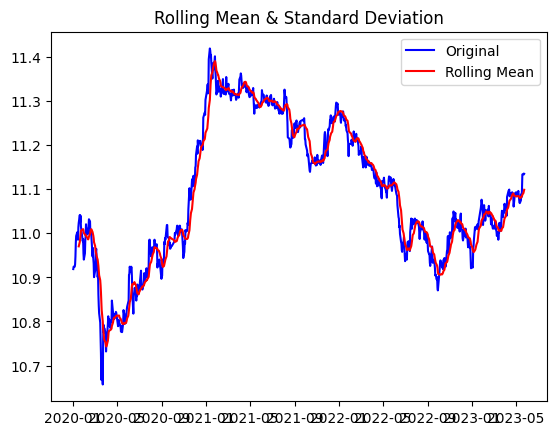


정량적 Augmented Dicky-Fuller Test :
Results of Dickey-Fuller Test:
Test Statistic                  -1.664354
p-value                          0.449565
#Lags Used                       0.000000
Number of Observations Used    839.000000
Critical Value (1%)             -3.438168
Critical Value (5%)             -2.864991
Critical Value (10%)            -2.568608
dtype: float64

시계열 분해 (Time Series Decomposition) :


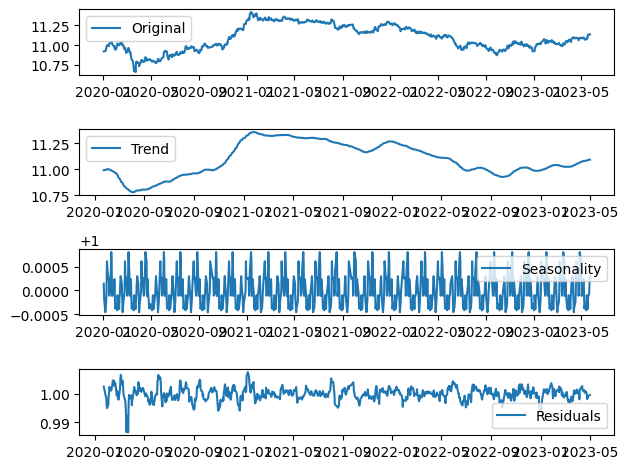

In [59]:
print()
print('\033[31m'+'\033[1m' + "정성적 그래프 분석 :" + '\033[0m')
# 정성적 그래프 분석
plot_rolling_statistics(ss_log, window=12)

print()
print('\033[31m'+'\033[1m' + "정량적 Augmented Dicky-Fuller Test :" + '\033[0m')
#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ss_log)

print()
print('\033[31m'+'\033[1m' + "시계열 분해 (Time Series Decomposition) :" + '\033[0m')
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ss_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ss_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

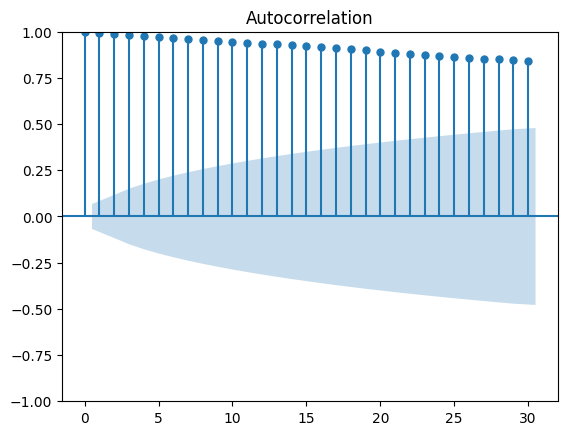

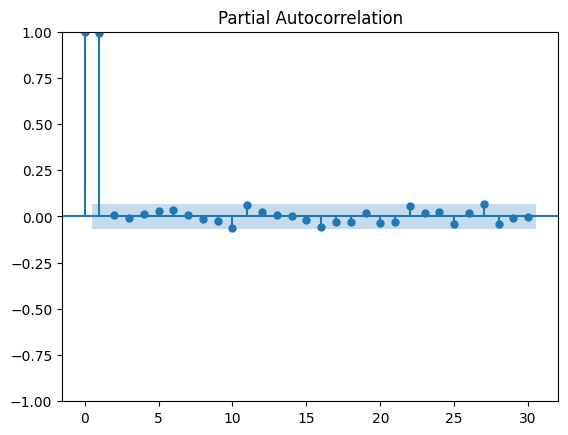

In [60]:
# ACF ,PACF 그래프 확인
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

plot_acf(ss_log)
plot_pacf(ss_log)
plt.show()

In [61]:
#차분을 통해서 정상성 확보
# 1차 차분
print('1차 차분')
diff_1 = ss_log.diff(periods=1).iloc[1:]
print(diff_1)
augmented_dickey_fuller_test(diff_1)

1차 차분
Date
2020-01-03    0.005420
2020-01-06    0.000000
2020-01-07    0.005391
2020-01-08    0.017762
2020-01-09    0.031198
                ...   
2023-05-18    0.018293
2023-05-19    0.032692
2023-05-22    0.001461
2023-05-23   -0.001461
2023-05-24    0.001461
Name: Close, Length: 839, dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -29.187263
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    838.000000
Critical Value (1%)             -3.438177
Critical Value (5%)             -2.864995
Critical Value (10%)            -2.568610
dtype: float64


In [62]:
# 1차 차분
print('2차 차분')
diff_2 = diff_1.diff(periods=1).iloc[1:]
print(diff_2)
augmented_dickey_fuller_test(diff_2)

2차 차분
Date
2020-01-06   -0.005420
2020-01-07    0.005391
2020-01-08    0.012372
2020-01-09    0.013436
2020-01-10   -0.015957
                ...   
2023-05-18    0.024428
2023-05-19    0.014399
2023-05-22   -0.031231
2023-05-23   -0.002922
2023-05-24    0.002922
Name: Close, Length: 838, dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.171871e+01
p-value                        1.430453e-21
#Lags Used                     1.800000e+01
Number of Observations Used    8.190000e+02
Critical Value (1%)           -3.438360e+00
Critical Value (5%)           -2.865075e+00
Critical Value (10%)          -2.568653e+00
dtype: float64


In [63]:
model =pm.arima.auto_arima(y=y_train , d=1,
                           start_p=0, max_p=3,
                           start_q=0 , max_q=3, 
                           m=1, seasonal=False ,
                           stepwise=True,
                           trace=True
                          )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3120.627, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3118.628, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3118.626, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3122.363, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3117.174, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.232 seconds


In [64]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  588
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1562.182
Date:                Wed, 24 May 2023   AIC                          -3122.363
Time:                        11:29:36   BIC                          -3117.988
Sample:                             0   HQIC                         -3120.659
                                - 588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   1.02e-05     28.053      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               297.71
Prob(Q):                              0.97   Pr

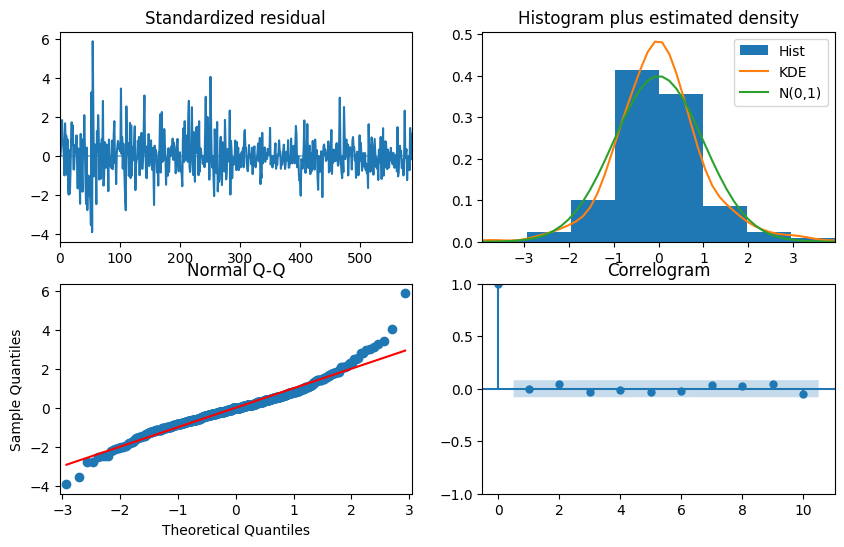

In [65]:
#model.plot_diagnostics 이용해서 그래프로 확인 하기

model.plot_diagnostics(figsize=(10,6))
plt.show()

In [66]:
# 테스트 데이터를 통한 예측
y_predict = model.predict(n_periods=len(y_test))
y_predict_df = pd.DataFrame(y_predict, index=y_test.index , columns=['prediction'])

/Users/taewon/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/taewon/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


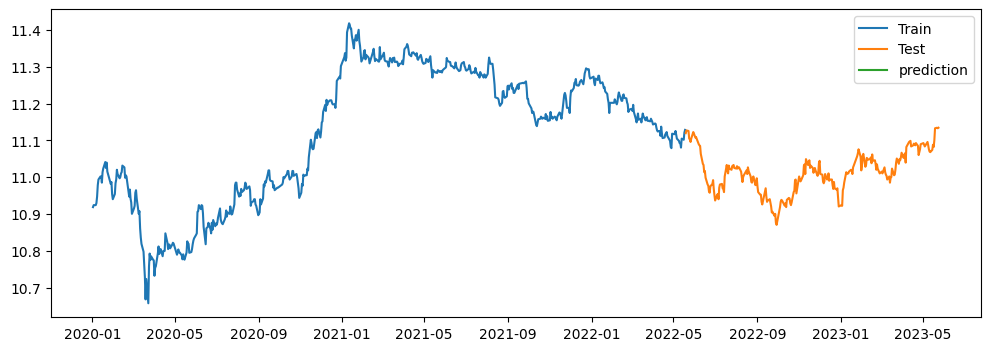

In [68]:
# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_test, label='Test')          # 테스트 데이터
plt.plot(y_predict_df, label='prediction')  # 예측 데이터
plt.legend()
plt.show()